In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Read in new locations data
locations_data = pd.read_csv("locations.csv")
locations_df = pd.DataFrame(locations_data)
locations_df.head()

,locationName,streetAddress,city,state,postalCode,phoneNumber,storeID
0,Gates of Prosper,"1140 S Preston Rd, Ste 10",Prosper,TX,75078,945-207-1286,6211
1,Berkshire,"6109 Berkshire Ln, Ste A",Dallas,TX,75225,945-279-0912,6206
2,Conroe,"247 S Loop 336 W, Ste 700",Conroe,TX,77304,936-444-4601,6008
3,Lake Jackson,"401-A This Way,",Lake Jackson,TX,77566,979-480-1223,5798
4,Montfort,"15125 Montfort Road,",Dallas,TX,75254,469-885-8080,5176


In [45]:
# Read in reviews data
reviews_data = pd.read_csv("technicalAssessment-GoogleReviews.csv", encoding='utf-8')
reviews_df = pd.DataFrame(reviews_data)
reviews_df.head()

,name,storeID,fullAddress,phone,website,overallRating,numberReviews,reviewer,reviewRating,reviewText,reviewDate
0,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Olga Garcia,2,How do you have 3 people working a lunch shift...,2024-03-05T19:11:20.386Z
1,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Melissa Trevino,1,Just be aware of being double charged during t...,2024-03-05T19:11:20.386Z
2,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Roger Stierman,5,"Always delicious,new crew being trainedFood: 5...",2024-02-27T19:11:20.386Z
3,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Eric Brown,5,Very clean and nice location with friendly peo...,2024-02-27T19:11:20.387Z
4,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,AJ D.,2,It’s not even busy so I can’t BELIEVE how long...,2024-02-19T00:00:00.000Z


In [46]:
# Check dtypes to prepare for merge
print(f'reviews df dtypes: \n{reviews_df.dtypes}')
print('------------------------')
print(f'locations df dtypes: \n{locations_df.dtypes}')

reviews df dtypes: 
name              object
storeID            int64
fullAddress       object
phone             object
website           object
overallRating    float64
numberReviews      int64
reviewer          object
reviewRating       int64
reviewText        object
reviewDate        object
dtype: object
------------------------
locations df dtypes: 
locationName     object
streetAddress    object
city             object
state            object
postalCode        int64
phoneNumber      object
storeID           int64
dtype: object


In [47]:
# Merge datasets on storeID and save as new csv
merged_df = pd.merge(reviews_df, locations_df, on="storeID")
merged_df.to_csv("merged.csv", encoding='utf-8')
merged_df.head()

,name,storeID,fullAddress,phone,website,overallRating,numberReviews,reviewer,reviewRating,reviewText,reviewDate,locationName,streetAddress,city,state,postalCode,phoneNumber
0,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Olga Garcia,2,How do you have 3 people working a lunch shift...,2024-03-05T19:11:20.386Z,Berkshire,"6109 Berkshire Ln, Ste A",Dallas,TX,75225,945-279-0912
1,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Melissa Trevino,1,Just be aware of being double charged during t...,2024-03-05T19:11:20.386Z,Berkshire,"6109 Berkshire Ln, Ste A",Dallas,TX,75225,945-279-0912
2,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Roger Stierman,5,"Always delicious,new crew being trainedFood: 5...",2024-02-27T19:11:20.386Z,Berkshire,"6109 Berkshire Ln, Ste A",Dallas,TX,75225,945-279-0912
3,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Eric Brown,5,Very clean and nice location with friendly peo...,2024-02-27T19:11:20.387Z,Berkshire,"6109 Berkshire Ln, Ste A",Dallas,TX,75225,945-279-0912
4,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,AJ D.,2,It’s not even busy so I can’t BELIEVE how long...,2024-02-19T00:00:00.000Z,Berkshire,"6109 Berkshire Ln, Ste A",Dallas,TX,75225,945-279-0912


In [48]:
# Perform exploratory data analysis
merged_df.groupby('city').describe().head()

storeID                                                           \
             count         mean         std     min     25%     50%     75%   
city                                                                          
Alexandria  1881.0  1681.285486   16.593637  1668.0  1668.0  1668.0  1702.0   
Allen        952.0  1669.000000    0.000000  1669.0  1669.0  1669.0  1669.0   
Arlington    918.0  1738.000000    0.000000  1738.0  1738.0  1738.0  1738.0   
Arlington   1207.0  1715.000000    0.000000  1715.0  1715.0  1715.0  1715.0   
Atlanta      590.0  1738.891525  109.591873  1672.0  1722.0  1722.0  1722.0   

                   overallRating            ... reviewRating      postalCode  \
               max         count      mean  ...          75%  max      count   
city                                        ...                                
Alexandria  1702.0        1881.0  3.939075  ...          5.0  5.0     1881.0   
Allen       1669.0         952.0  4.100000  ...          5.0  5.0      952.0   
Arlington   1738.0         918.0  4.100000  ...          5.0  5.0      918.0   
Arlington   1715.0        1207.0  4.300000  ...          5.0  5.0     1207.0   
Atlanta     2441.0         590.0  4.081017  ...          5.0  5.0      590.0   

                                                                        \
                    mean       std      min      25%      50%      75%   
city                                                                     
Alexandria  22314.390750  0.488048  22314.0  22314.0  22314.0  22315.0   
Allen       75013.000000  0.000000  75013.0  75013.0  75013.0  75013.0   
Arlington   76015.000000  0.000000  76015.0  76015.0  76015.0  76015.0   
Arlington   76011.000000  0.000000  76011.0  76011.0  76011.0  76011.0   
Atlanta     30337.511864  2.926205  30320.0  30338.0  30338.0  30338.0   

                     
                max  
city                 
Alexandria  22315.0  
Allen       75013.0  
Arlington   76015.0  
Arlington   76011.0  
Atlanta     30338.0  

[5 rows x 40 columns]

In [49]:
# Examine count of restaurants per city
locations = merged_df.drop_duplicates(subset='storeID')
loc_per_city = locations.groupby('city')['storeID'].count().sort_values(ascending=False).head(10)
print(loc_per_city)

city
Dallas         10
Houston        10
Austin          4
Atlanta         3
San Antonio     3
Ft. Worth       3
Alexandria      2
Plano           2
Phoenix         2
El Paso         2
Name: storeID, dtype: int64


In [50]:
# Examine avg rating of restaurants by city
city_ratings = merged_df.groupby('city')['overallRating'].mean().sort_values(ascending=False)
print(f'Highest Performing Cities by Customer Satisfaction: {city_ratings.head(10)}')

Highest Performing Cities by Customer Satisfaction: city
El Paso         4.5
Webster         4.4
San Antonio     4.4
Orlando         4.4
Little Rock     4.4
Lafayette       4.4
Waco            4.3
Tulsa           4.3
Sugarland       4.3
San Antonio     4.3
Name: overallRating, dtype: float64


In [51]:
# Examine highest and lowest rated restaurants + cities
store_ratings_high = merged_df.groupby('locationName').agg({'city': 'first', 'state': 'first', 'overallRating': 'mean'})
store_ratings_high = store_ratings_high.sort_values(by='overallRating', ascending=False)
print(f'Highest Performing Restaurants by Customer Satisfaction: \n{store_ratings_high.head()}')

print('----------------------')

store_ratings_low = merged_df.groupby('locationName').agg({'city': 'first', 'state': 'first', 'overallRating': 'mean'})
store_ratings_low = store_ratings_low.sort_values(by='overallRating')
print(f'Lowest Performing Restaurants by Customer Satisfaction: \n{store_ratings_low.head()}')

Highest Performing Restaurants by Customer Satisfaction: 
                             city state  overallRating
locationName                                          
Tierra Del Este          El Paso     TX            4.5
Fountains at Farrah       El Paso    TX            4.5
Alamo Heights        San Antonio     TX            4.4
Parkway Village           Houston    TX            4.4
Clearlake                 Webster    TX            4.4
----------------------
Lowest Performing Restaurants by Customer Satisfaction: 
                                              city state  overallRating
locationName                                                           
Berkshire                                   Dallas    TX            3.1
Atlanta Airport Kiosk - Terminal C Gate 7  Atlanta    GA            3.4
Atlanta Airport Kiosk Terminal C Gate 40   Atlanta    GA            3.4
Gates of Prosper                           Prosper    TX            3.5
Park District - Petite Market & Bakery      D

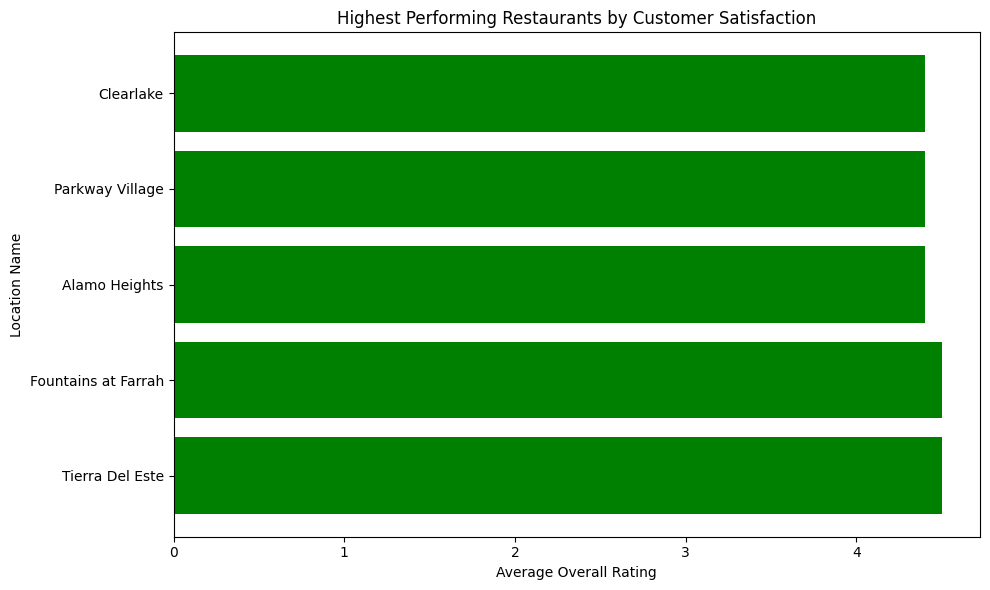

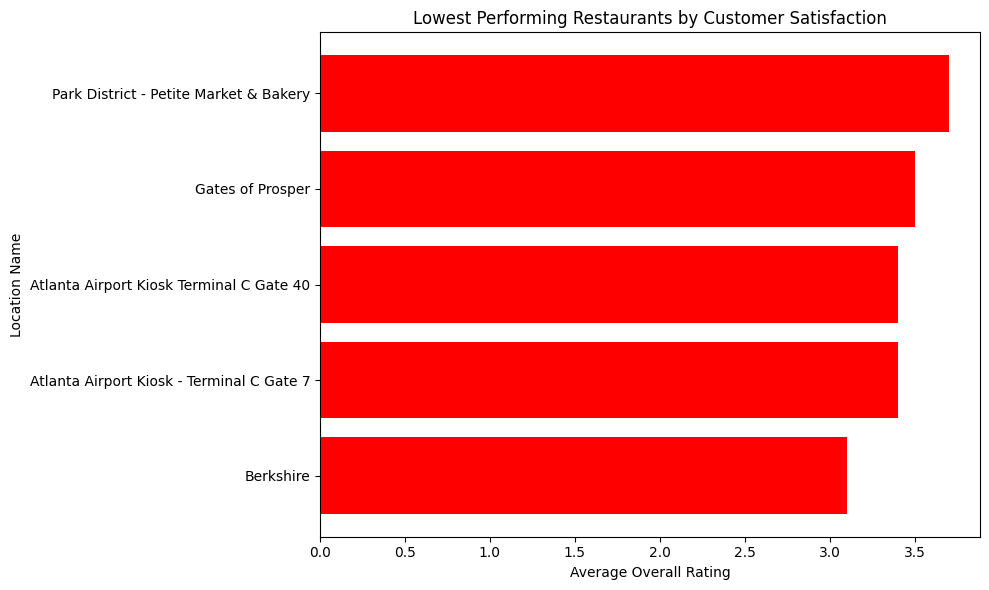

In [52]:
# Plot highest performing restaurants
plt.figure(figsize=(10, 6))
plt.barh(store_ratings_high.head(5).index, store_ratings_high.head(5)['overallRating'], color='green')
plt.xlabel('Average Overall Rating')
plt.ylabel('Location Name')
plt.title('Highest Performing Restaurants by Customer Satisfaction')
plt.tight_layout()
plt.show()

# Plot lowest performing restaurants
plt.figure(figsize=(10, 6))
plt.barh(store_ratings_low.head(5).index, store_ratings_low.head(5)['overallRating'], color='red')
plt.xlabel('Average Overall Rating')
plt.ylabel('Location Name')
plt.title('Lowest Performing Restaurants by Customer Satisfaction')
plt.tight_layout()
plt.show()
